In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# (EDA) Exploratory Data Analysis

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

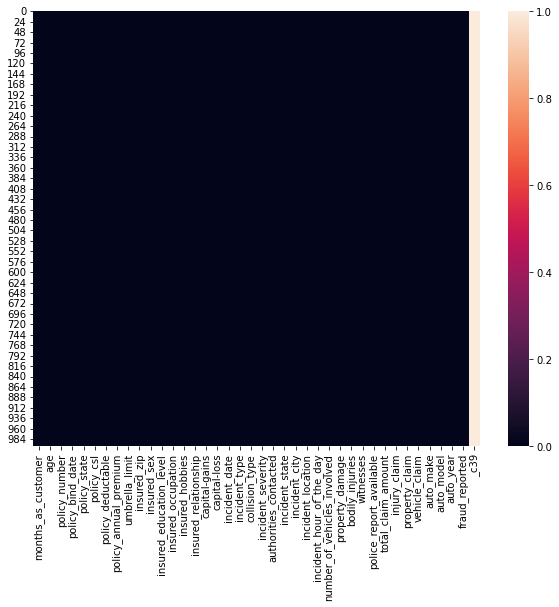

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

only one column HAS NULL VALUE AND THAT TOO ALL NULL

SO DROPPING IT

In [8]:
df.drop('_c39',axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


SO NOW NO NULL VALUES OR MISSING VALUES PRESENT CAN MOVE FORWARD

In [9]:
df['policy_bind_date'].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [10]:
df['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

hence all the report are of yeaar 2015 and also of month 1,2,3 we can drop incident date.



In [11]:
df['Policy_Day']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.day
df['Policy_Month']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.month
df['Policy_Year']=pd.to_datetime(df.policy_bind_date,format="%d-%m-%Y").dt.year

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


can drop policy bind date and incident date.

In [12]:
# dropping policy_bind_date and incident_date as it is now seperated 
df.drop('incident_date',axis=1,inplace=True)
df.drop('policy_bind_date',axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


In [13]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [14]:
df[["limit", "total"]]=df["policy_csl"].str.split("/", expand=True)
df["policy_csl_decimal"] = df["limit"].astype(float) / df["total"].astype(float)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,limit,total,policy_csl_decimal
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,250,500,0.500000
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,6,2006,250,500,0.500000
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,6,9,2000,100,300,0.333333
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,5,1990,250,500,0.500000
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,6,2014,500,1000,0.500000


In [15]:
df.drop('policy_csl',axis=1,inplace=True)
df.drop('limit',axis=1,inplace=True)
df.drop('total',axis=1,inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,...,13020,52080,Saab,92x,2004,Y,17,10,2014,0.500000
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,...,780,3510,Mercedes,E400,2007,Y,27,6,2006,0.500000
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,...,3850,23100,Dodge,RAM,2007,N,6,9,2000,0.333333
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,0.500000
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,...,650,4550,Accura,RSX,2009,N,6,6,2014,0.500000


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

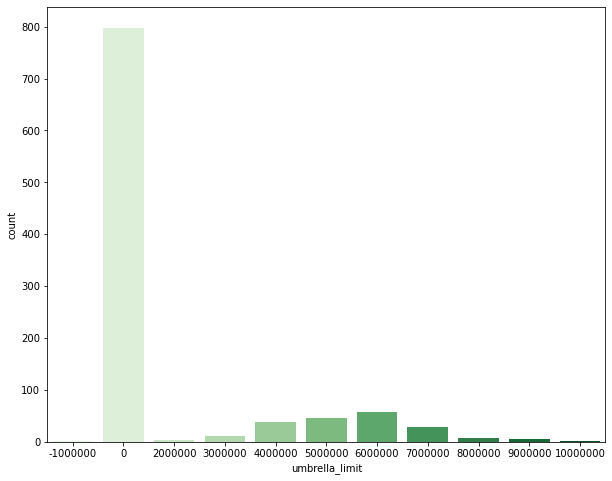

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(df['umbrella_limit'],palette='Greens')
df['umbrella_limit'].value_counts()

umbrella_limit 0 has highest count,i.e. many didn't included in insurance

umbrella_limit in minus would mean they might have claimed earlier.

umbrella limit is high around 6000000.



N    753
Y    247
Name: fraud_reported, dtype: int64

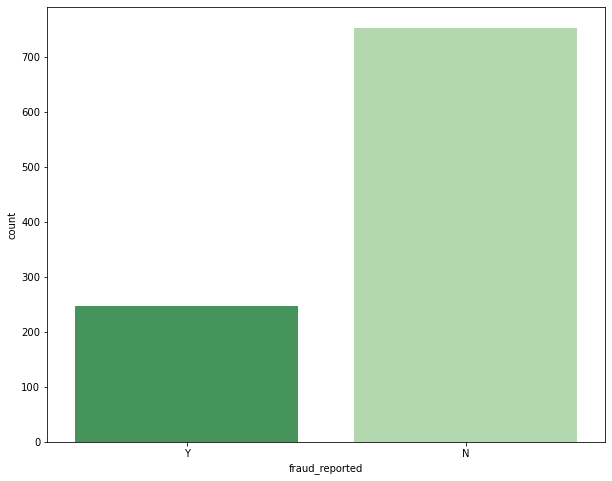

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df['fraud_reported'],palette='Greens_r')
df['fraud_reported'].value_counts()

yes fraud report are low compared to no

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

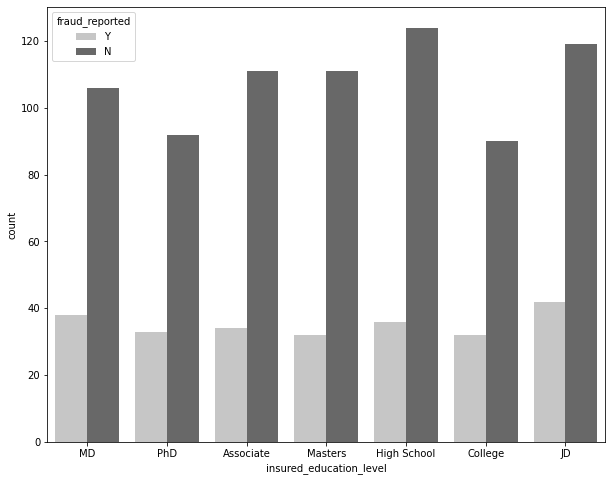

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='insured_education_level',hue='fraud_reported',palette='Greys')
df['insured_education_level'].value_counts()

Fraud cases are not dependednt on education level as all group are having almost same count of fraud case

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

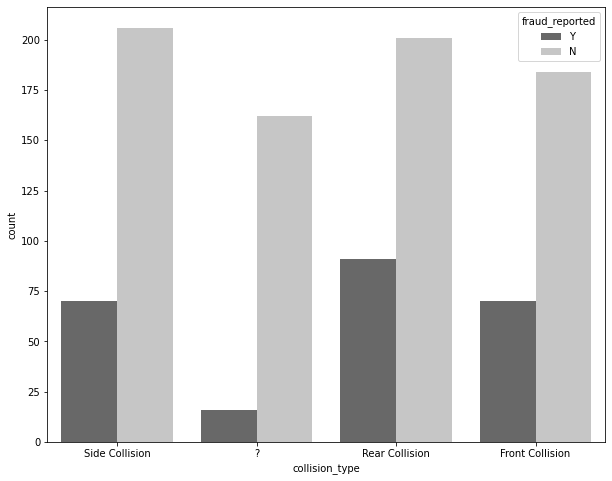

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='collision_type',hue='fraud_reported',palette='Greys_r')
df['collision_type'].value_counts()

rear collision are having maximum no. of fraud case

? i.e. not knowing the collision type are having less fraud case

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

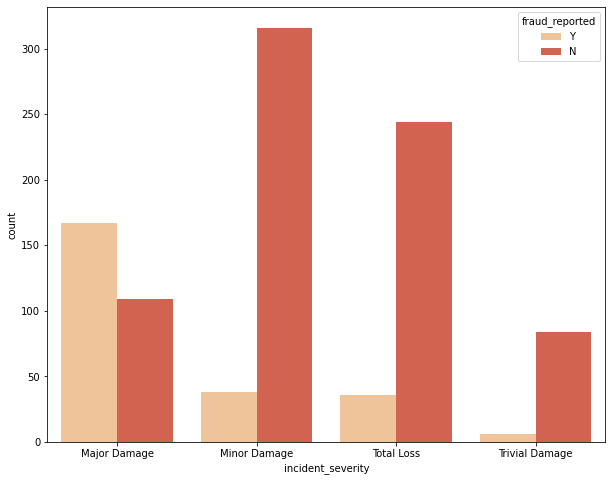

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='incident_severity',hue='fraud_reported',palette='OrRd')

df['incident_severity'].value_counts()

MAJOR DAMAGE ARE HAVING HIGH FRAUD CASE AS MIGHT BE CLAIMING INSURANCE AFTER A MAJOR DAMAGE

TRIVIAL DAMAGE ARE HAVING LOW COUNT ON FRAUD CASE

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

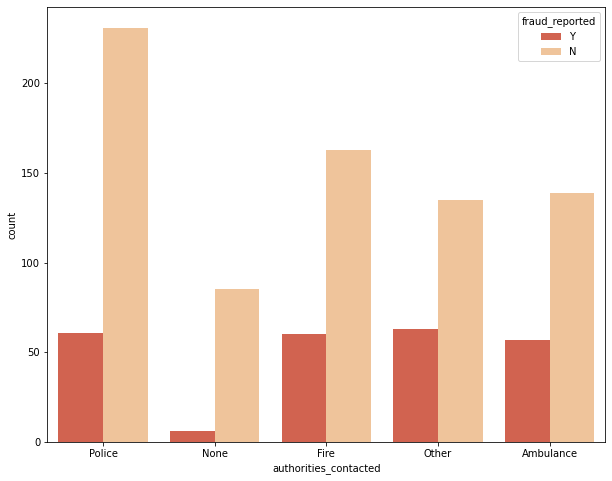

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='authorities_contacted',hue='fraud_reported',palette='OrRd_r')
df['authorities_contacted'].value_counts()

EVEN AFTER CALLING POLICE,FIRE AND OTHER AUTHORITIES THEY HAVE A FRAUD CASE MARKED.

WELL MANY CONTACTED POLICE AFTER DAMAGE AND CLAIMED INSURANCE

In [22]:
df['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

In [23]:
df['capital-loss'].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

In [24]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [25]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

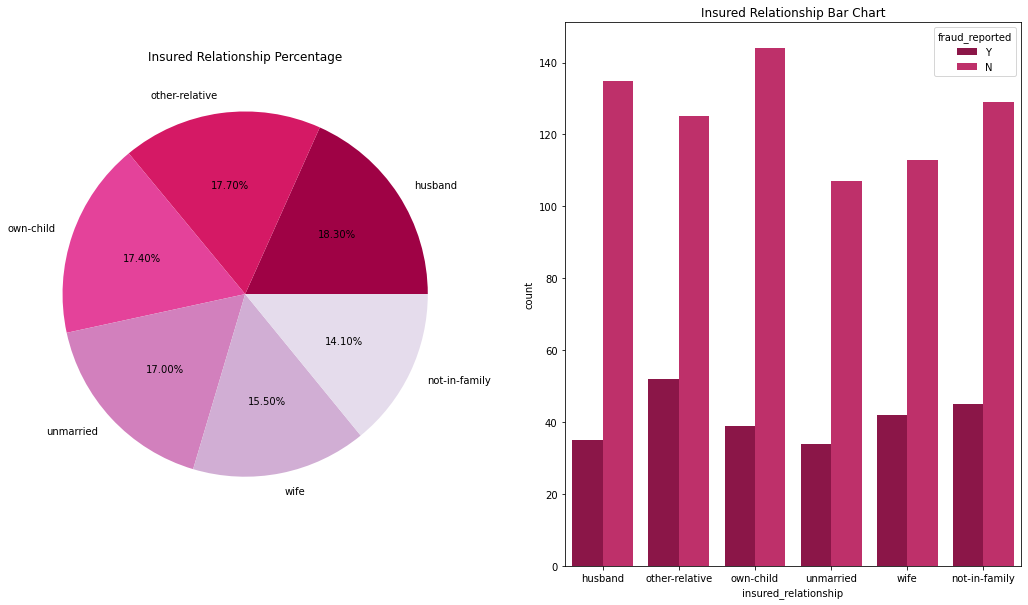

In [26]:
colors=sns.color_palette('PuRd_r')
labels=df['insured_relationship'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Insured Relationship Percentage')
plt.pie(df['insured_relationship'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Insured Relationship Bar Chart')
sns.countplot(x="insured_relationship", data=df, palette=colors,hue='fraud_reported')

df.insured_relationship.value_counts(dropna=False)

Issued Relationship is evenly distributed almost

other relative are high in fraud case.



Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

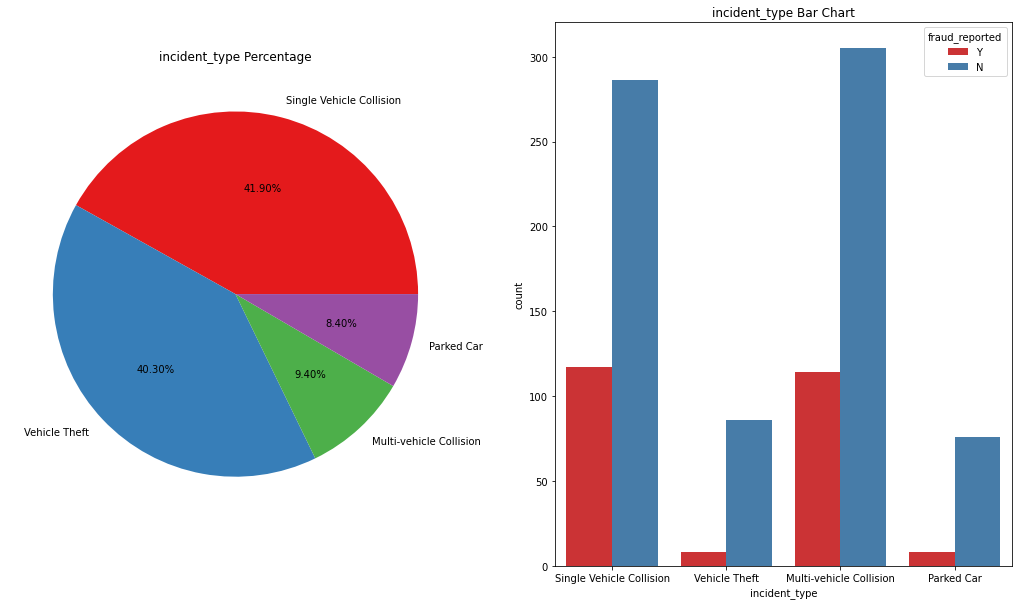

In [27]:
colors=sns.color_palette('Set1')
labels=df['incident_type'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('incident_type Percentage')
plt.pie(df['incident_type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('incident_type Bar Chart')
sns.countplot(x="incident_type", data=df, palette=colors,hue='fraud_reported')

df.incident_type.value_counts(dropna=False)

Single Vehicle Collision are high upto 41.9% followed by vehicle theft.

least with parked car.



1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

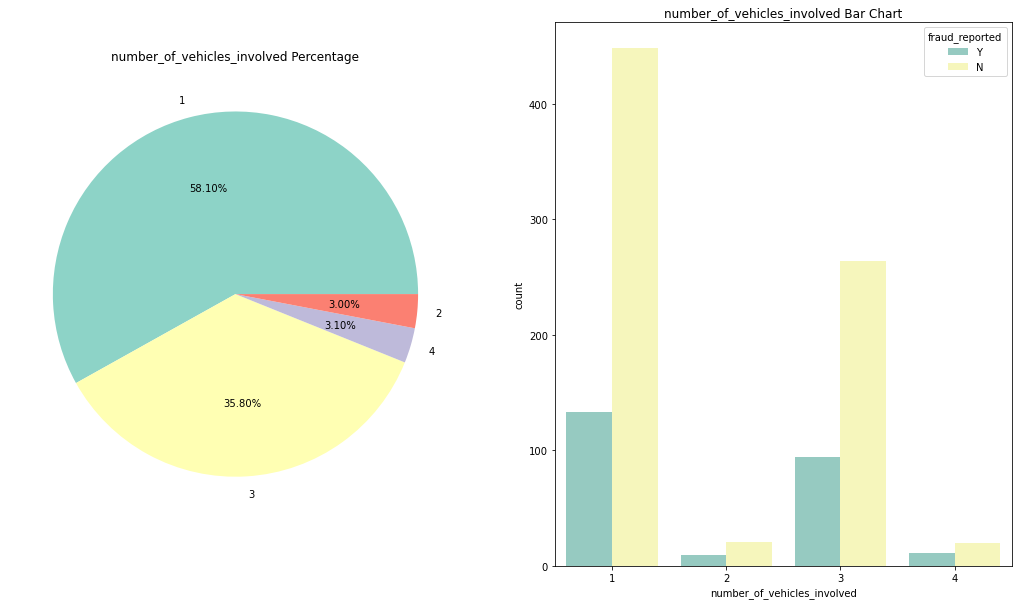

In [28]:
colors=sns.color_palette('Set3')
labels=df['number_of_vehicles_involved'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('number_of_vehicles_involved Percentage')
plt.pie(df['number_of_vehicles_involved'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('number_of_vehicles_involved Bar Chart')
sns.countplot(x="number_of_vehicles_involved", data=df, palette=colors,hue='fraud_reported')

df.number_of_vehicles_involved.value_counts(dropna=False)


1 VEHICLE INVOLVED IN COLLISION ARE HAVING HIGH CASES FOLLOWED BY 3 VEHICLES.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

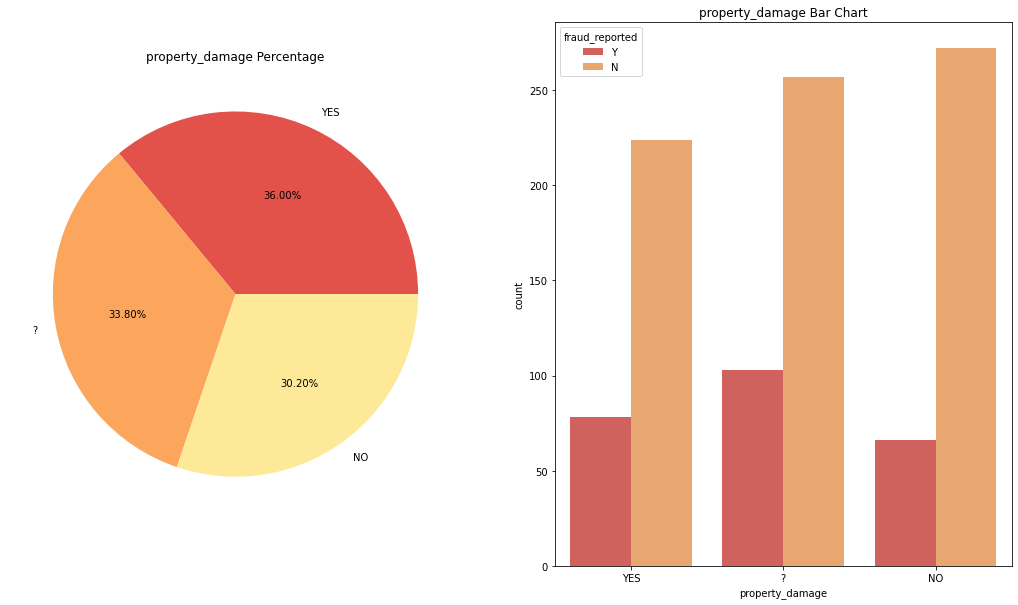

In [30]:
colors=sns.color_palette('Spectral')
labels=df['property_damage'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('property_damage Percentage')
plt.pie(df['property_damage'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('property_damage Bar Chart')
sns.countplot(x="property_damage", data=df, palette=colors,hue='fraud_reported')

df.property_damage.value_counts(dropna=False)

PROPERTY DAMAGE ARE EVEN IN ALL CASES . DONT KNOW ABOUT PROPERTY DAMAGE ARE ALSO HAVING SAME PERCENTAGE, BUT HAVE HIGH FRAUD CASE COMPARED TO OTHER



0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

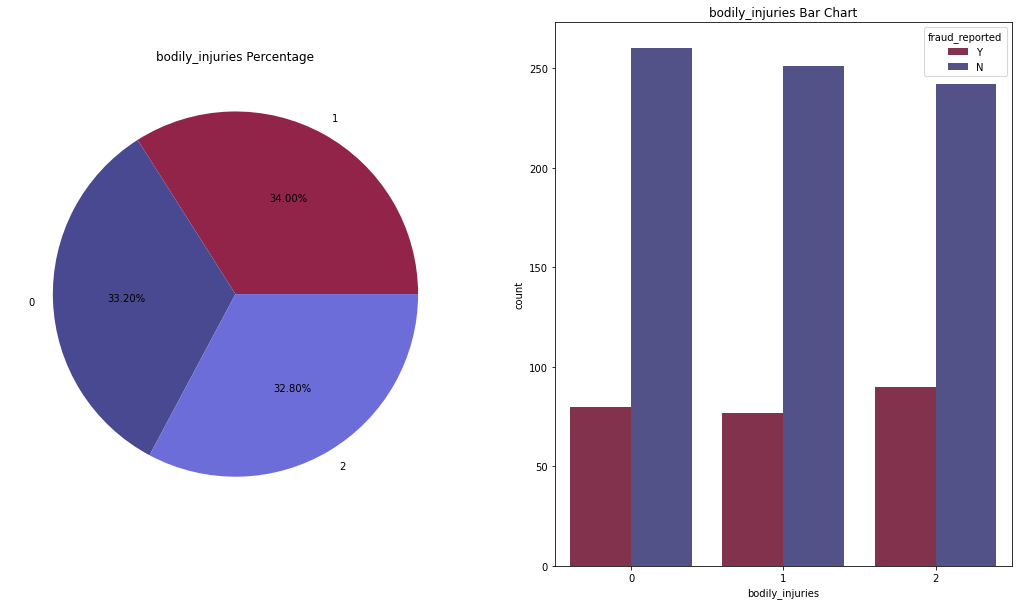

In [31]:
colors=sns.color_palette('gist_stern')
labels=df['bodily_injuries'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('bodily_injuries Percentage')
plt.pie(df['bodily_injuries'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('bodily_injuries Bar Chart')
sns.countplot(x="bodily_injuries", data=df, palette=colors,hue='fraud_reported')

df.bodily_injuries.value_counts(dropna=False)

BODY INJURED 0,1,2 ARE HAVING SAME PERCENTAGE, ALSO HAVING SAME AMOUNT OF YES AND NO FRAUD CASE.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

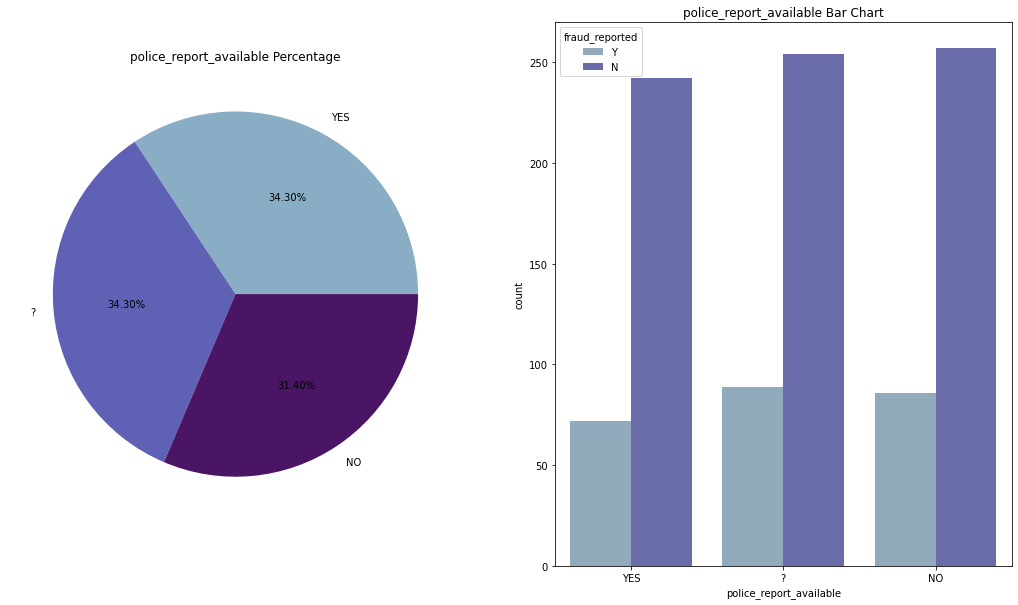

In [32]:
colors=sns.color_palette('twilight')
labels=df['police_report_available'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('police_report_available Percentage')
plt.pie(df['police_report_available'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('police_report_available Bar Chart')
sns.countplot(x="police_report_available", data=df, palette=colors,hue='fraud_reported')

df.police_report_available.value_counts(dropna=False)

POLICE REPORT ALSO HAVE EVEN PERCENTAGE OF COUNT

POLICE REPORT IS NOT NECESSARY IN MINOR CASE OR NON ACCIDENTAL FOR CLAIMING

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

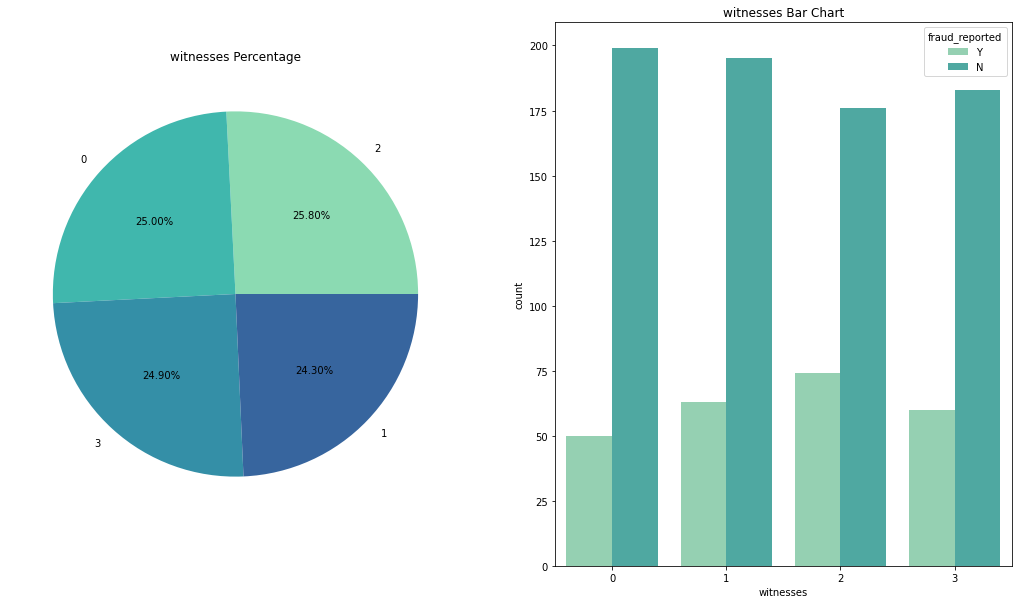

In [33]:
colors=sns.color_palette('mako_r')
labels=df['witnesses'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('witnesses Percentage')
plt.pie(df['witnesses'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')




plt.subplot(1,2,2)
plt.title('witnesses Bar Chart')
sns.countplot(x="witnesses", data=df, palette=colors,hue='fraud_reported')


df.witnesses.value_counts(dropna=False)

WITNESSES ARE HAVING EQUAL DISTRIBUTION AROUND 25% FOR ANY NO. OF PEOPLE

WITNESSES WITH 2 ARE HAVING HIGH FRAUD CASES.

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

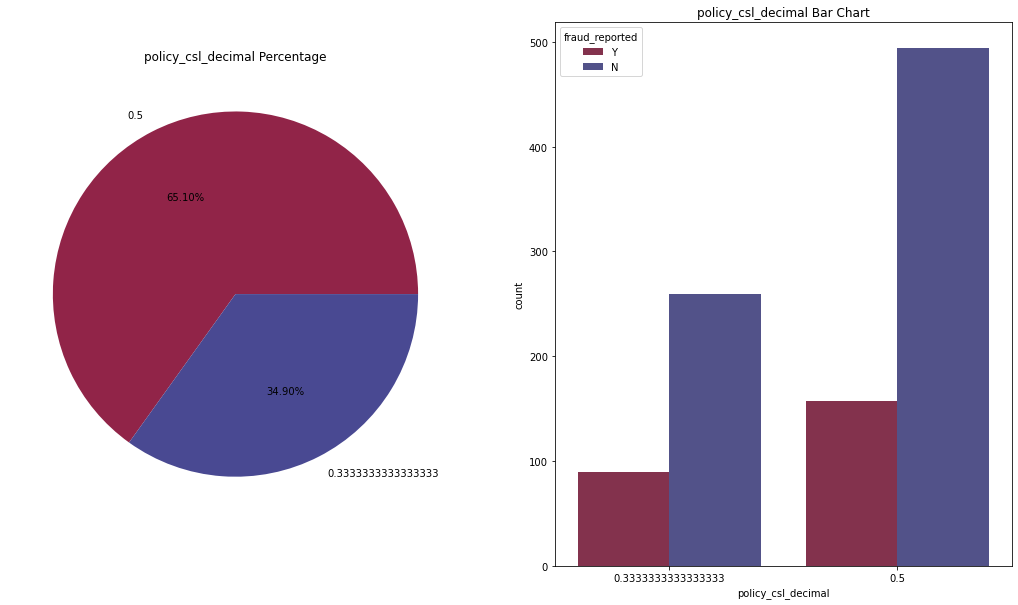

In [34]:
colors=sns.color_palette('gist_stern')
labels=df['policy_csl_decimal'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('policy_csl_decimal Percentage')
plt.pie(df['policy_csl_decimal'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('policy_csl_decimal Bar Chart')
sns.countplot(x="policy_csl_decimal", data=df, palette=colors,hue='fraud_reported')

df.bodily_injuries.value_counts(dropna=False)


POLICY CSL LEADS TO CLAIM A PERSON CAN HAVE ON INSURANCE AND ALSO DEPENDS ON INSURANCE TYPE

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

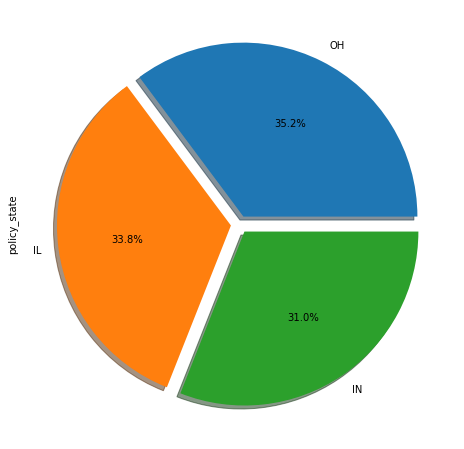

In [35]:
plt.figure(figsize=(10,8))
df.policy_state.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True);
df['policy_state'].value_counts()

OH HAS THE HIGHEST CLAIM FOLLOWED BY IL AND IN

<AxesSubplot:xlabel='injury_claim', ylabel='property_claim'>

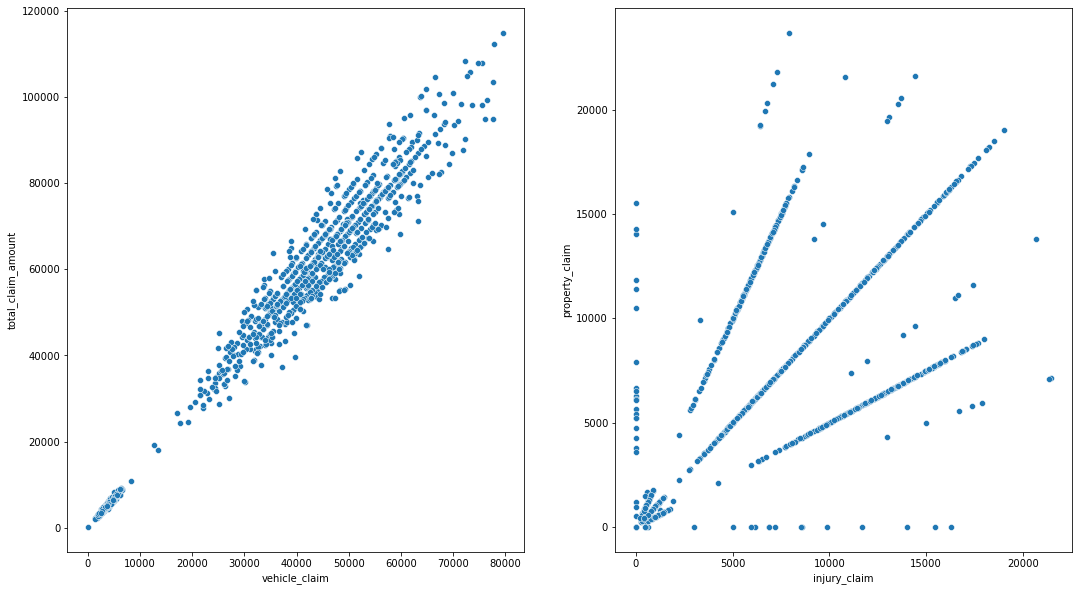

In [36]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='vehicle_claim',y='total_claim_amount')


plt.subplot(1,2,2)
sns.scatterplot(data=df,x='injury_claim',y='property_claim')


VEHICLE CLAIM IS DIRECTLY PROPOTIONAL TO TOTAL CLAIM AMOUNT.

INJURY CLAIM IS ALSO DIRECTLY PROPOTIONAL TO PROPERTY CLAIM

In [37]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,0.441833
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,0.079482
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,0.333333
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,0.333333
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,0.500000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,0.500000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,0.500000


POLICY_ANNUAL_PREMIUM , Capital-gain ,Capital-loss,and many other columns are having skewness.

deviation is also seen which means outliers may be present.

In [38]:
# label encoding target for relating columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['fraud_reported'] = LE.fit_transform(df['fraud_reported'])

# Correlation

In [39]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,...,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.025164
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,...,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,0.056776,0.008357,-0.037444,-0.011516
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443,0.045574,-0.003439,-0.040099,0.069440
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,...,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.000265,-0.025020,-0.049598,0.001592
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,...,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.029115
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622,-0.023361,-0.045871,0.048008,0.033119
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,...,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,-0.044250,0.025924,-0.001100,0.010793
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.004664,0.021193,0.041249,0.006824
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.025983,-0.028124,-0.026420,-0.034386
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,-0.013954,0.010163,0.035412,0.000832


<AxesSubplot:>

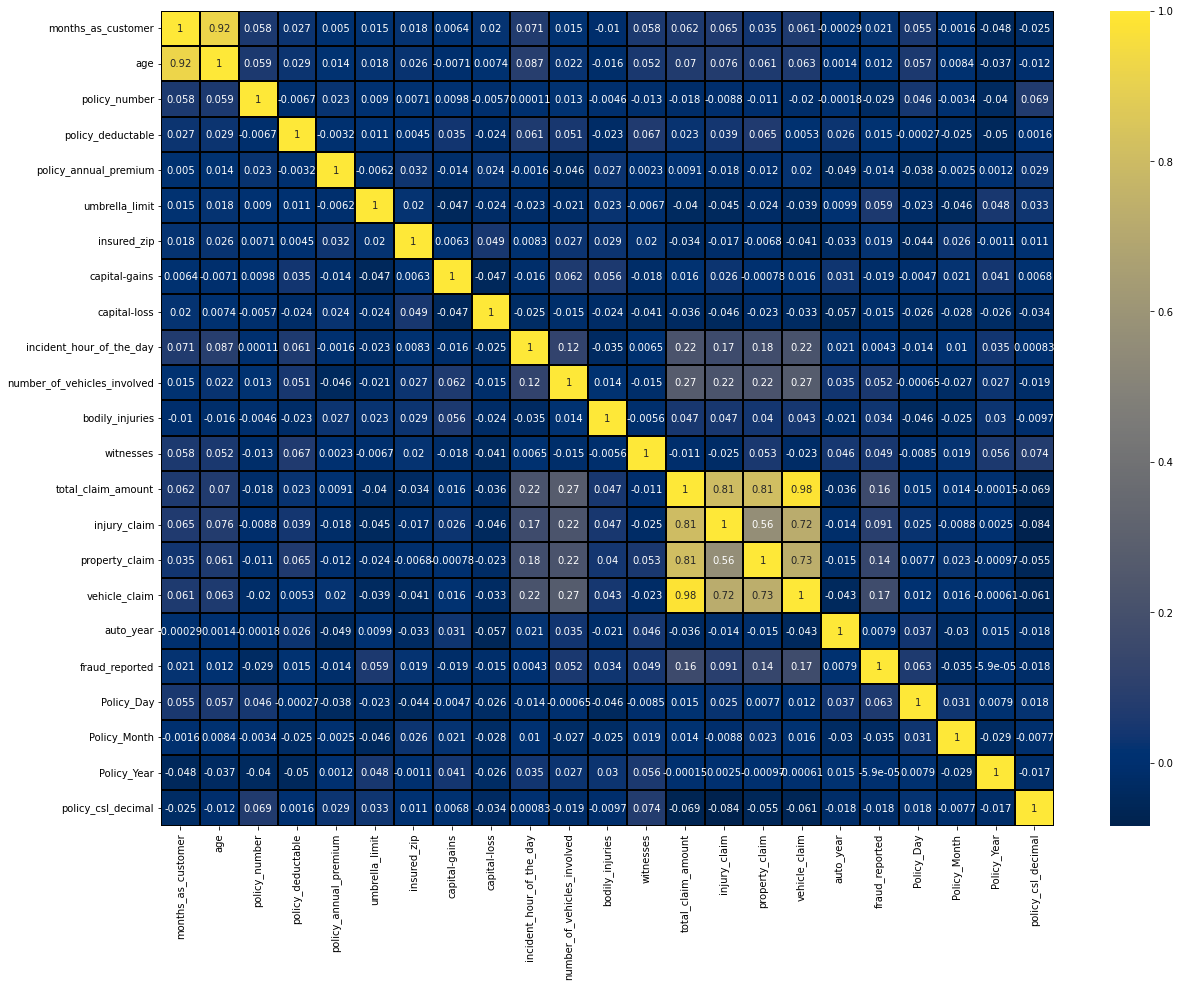

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='cividis',linecolor='black',linewidths=0.2)

VEHICLE CLAIM,PROPERTY CLAIM,INJURY CLAIM,TOTAL AMOUNT CLAIM ARE HIGHLY CORRELATED TO EACH OTHER

ALL OTHER COLUMNS ARE HAVING NORMAL CORRELATION ALSO WITH TARGET FRAUD DETECTION.

AGE AND MONTH AS CUSTOMER ARE ALSO HIGHLY CORRELATED.

In [41]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
obj=['policy_state','insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage','police_report_available','auto_make',
       'auto_model']

for o in obj:
    df[o] = LE.fit_transform(df[o])

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

# Checking outliers

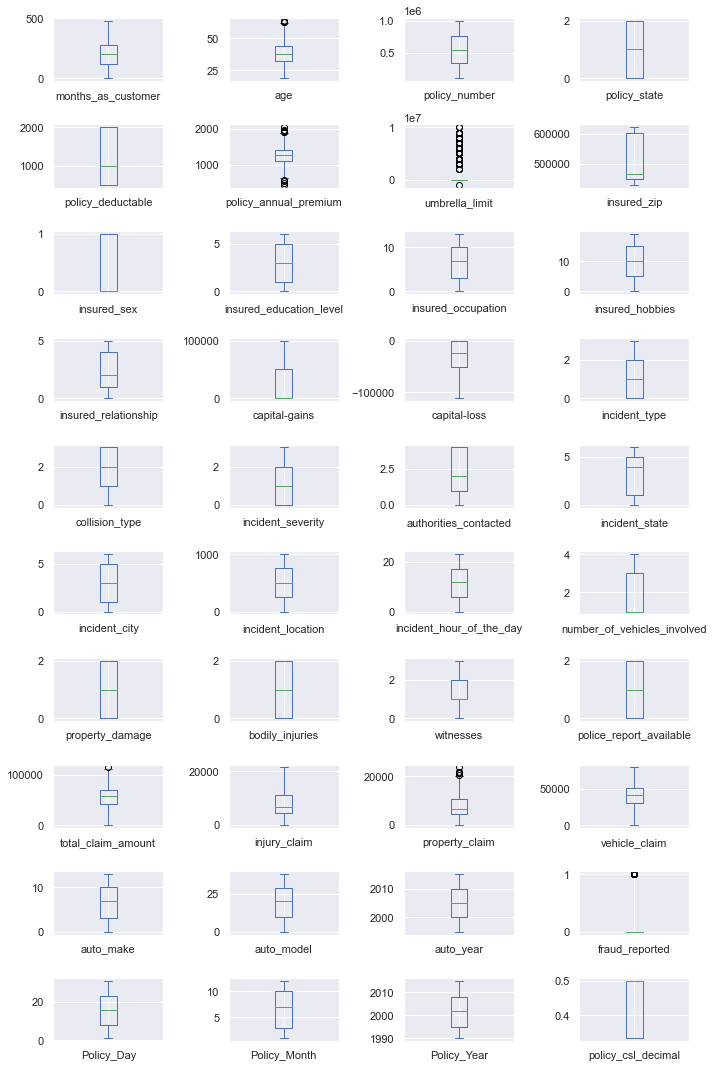

In [42]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(10,15))
plt.tight_layout()

age,property_claim,umbrella limit and policy annual premium are having some outliers

hence removing it.

# Removing outliers by zscore

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
0,1.078140,0.990836,0.095953,1.187173,0.222383,0.616705,0.479476,0.489529,1.076953,0.530931,...,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019,0.176292,0.983684,1.684992,0.732187
1,0.208995,0.334073,0.791527,0.016856,1.412784,0.242521,1.697980,0.461008,1.076953,0.530931,...,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019,1.312191,0.159802,0.597550,0.732187
2,0.608002,1.088913,0.550566,1.187173,1.412784,0.642233,1.697980,0.984885,0.928546,1.557877,...,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731,1.073198,0.697813,0.218032,1.365771
3,0.452355,0.224613,1.239334,1.220886,1.412784,0.652886,2.133471,1.491682,0.928546,1.557877,...,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019,1.085011,0.445674,1.577335,0.732187
4,0.208995,0.552994,0.695834,1.220886,0.222383,1.341980,2.133471,1.527808,1.076953,1.522961,...,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731,1.073198,0.159802,1.684992,0.732187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,1.187173,0.222383,0.222884,0.479476,0.975717,0.928546,1.044404,...,0.273817,1.224309,0.135388,1.196528,0.149180,0.572731,0.062702,0.126069,1.441405,0.732187
996,0.704407,0.224613,1.398429,1.220886,0.222383,0.739141,0.479476,1.492519,0.928546,1.557877,...,2.214794,1.821868,1.600357,0.780016,1.645974,0.572731,1.186788,1.589160,1.684992,1.365771
997,0.642767,0.541611,1.448920,1.187173,1.039966,0.520739,0.826998,0.815138,0.928546,1.044404,...,0.020826,0.771902,1.104430,0.028570,1.513924,0.572731,0.176292,1.303289,0.189759,0.732187
998,2.208028,2.523284,0.047867,1.220886,1.412784,0.411866,1.697980,0.830250,1.076953,1.522961,...,0.451976,0.073580,1.375206,1.286371,1.181303,0.572731,0.289882,1.269556,1.277201,0.732187


In [44]:
threshold=2.5
print(np.where(z>2.5))

(array([  6,  20,  31,  43,  48,  50,  59,  66,  67,  88, 106, 115, 119,
       133, 154, 157, 161, 163, 183, 184, 185, 202, 203, 226, 229, 248,
       255, 262, 263, 299, 301, 314, 349, 358, 366, 379, 394, 421, 430,
       458, 474, 486, 500, 503, 519, 533, 538, 541, 544, 588, 591, 619,
       628, 657, 658, 664, 674, 681, 687, 700, 708, 712, 745, 747, 763,
       791, 794, 795, 796, 807, 813, 816, 835, 836, 848, 848, 875, 878,
       922, 936, 947, 975, 998], dtype=int64), array([29,  1,  6,  5,  6,  6, 13,  6,  1,  6, 30,  6,  6,  5,  6,  6,  6,
       30,  6,  6,  6,  6,  1,  6,  5,  5,  6,  6,  6, 30, 30,  6,  6, 29,
        6,  5,  6, 30,  6,  6,  6,  5, 30,  6,  6, 13,  1,  6,  5,  1, 30,
        6,  5,  6,  6,  6,  6,  5, 30,  6, 30,  1, 30,  5,  5,  6,  6,  6,
        5, 14,  6, 13,  6, 29,  6, 30,  6,  5,  6,  6,  1,  6,  1],
      dtype=int64))


In [45]:
df1=df[(z<2.5).all(axis=1)]
x=df1
x

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
0,328,48,521585,2,1000,1406.91,0,466132,1,4,...,13020,52080,10,1,2004,1,17,10,2014,0.500000
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,...,780,3510,8,12,2007,1,27,6,2006,0.500000
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,...,3850,23100,4,30,2007,0,6,9,2000,0.333333
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,...,6340,50720,3,34,2014,1,25,5,1990,0.500000
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,...,650,4550,0,31,2009,0,6,6,2014,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,141,30,681486,1,1000,1347.04,0,430665,1,2,...,1080,4860,6,10,1996,0,24,3,2007,0.500000
995,3,38,941851,2,1000,1310.80,0,431289,0,5,...,8720,61040,6,6,2006,0,16,7,1991,0.500000
996,285,41,186934,0,1000,1436.79,0,608177,0,6,...,18080,72320,13,28,2015,0,5,1,2014,0.333333
997,130,34,918516,2,500,1383.49,3000000,442797,0,5,...,7500,52500,11,19,1996,0,17,2,2003,0.500000


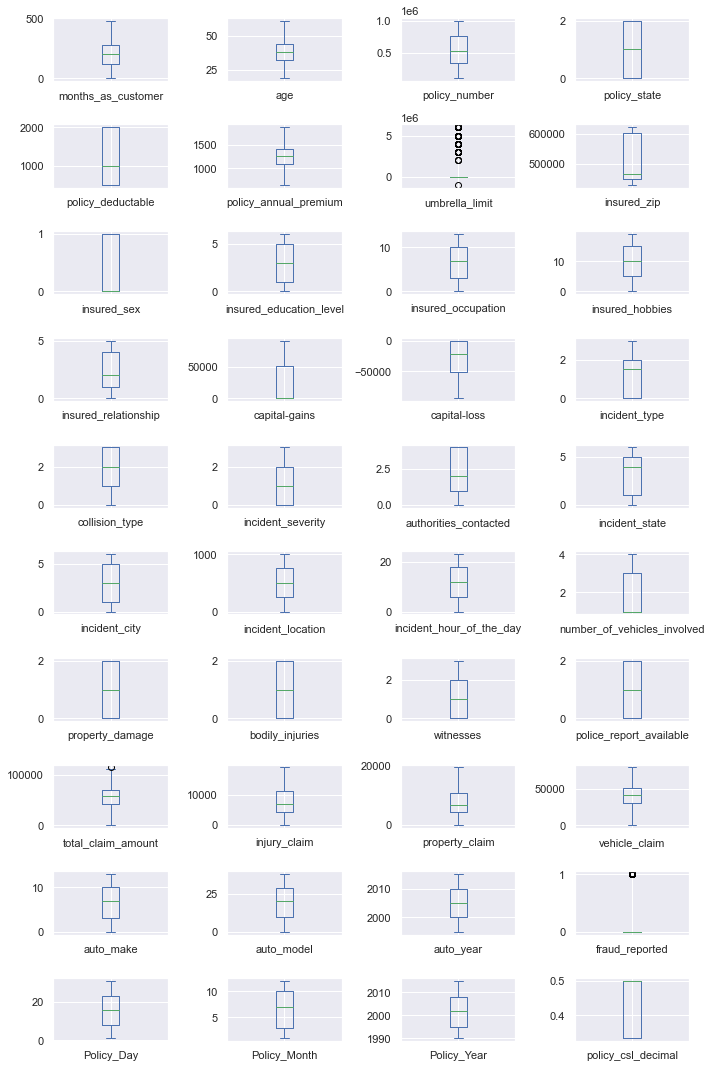

In [46]:
sns.set(style="darkgrid")
df1.plot(kind='box',subplots=True,layout=(10,4),figsize=(10,15))
plt.tight_layout()

only one column is having few outliers lets check loss percentage first before removing more outliers

# Percentage loss

In [47]:
loss_percent=(1000-918)/918*100
print(loss_percent,'%')

8.932461873638346 %


HENCE THE LOSS IS AROUND 9% SO CANNOT GO FURTHER WITH REMOVING OUTLIERS.

Separating Dataset

In [48]:
#independent column
x=df1.drop(['fraud_reported'],axis=1)
#target
y=df1['fraud_reported']

In [49]:
x.shape

(918, 39)

In [50]:
y.shape

(918,)

# Checking Skewness

In [51]:
df1.skew()

months_as_customer             0.334901
age                            0.413943
policy_number                  0.050378
policy_state                  -0.042770
policy_deductable              0.475376
policy_annual_premium          0.007686
umbrella_limit                 1.996170
insured_zip                    0.854993
insured_sex                    0.148800
insured_education_level        0.014516
insured_occupation            -0.051583
insured_hobbies               -0.042028
insured_relationship           0.084467
capital-gains                  0.434335
capital-loss                  -0.386617
incident_type                  0.091501
collision_type                -0.195544
incident_severity              0.260319
authorities_contacted         -0.127711
incident_state                -0.156948
incident_city                  0.054415
incident_location              0.003133
incident_hour_of_the_day      -0.042100
number_of_vehicles_involved    0.505034
property_damage                0.076077


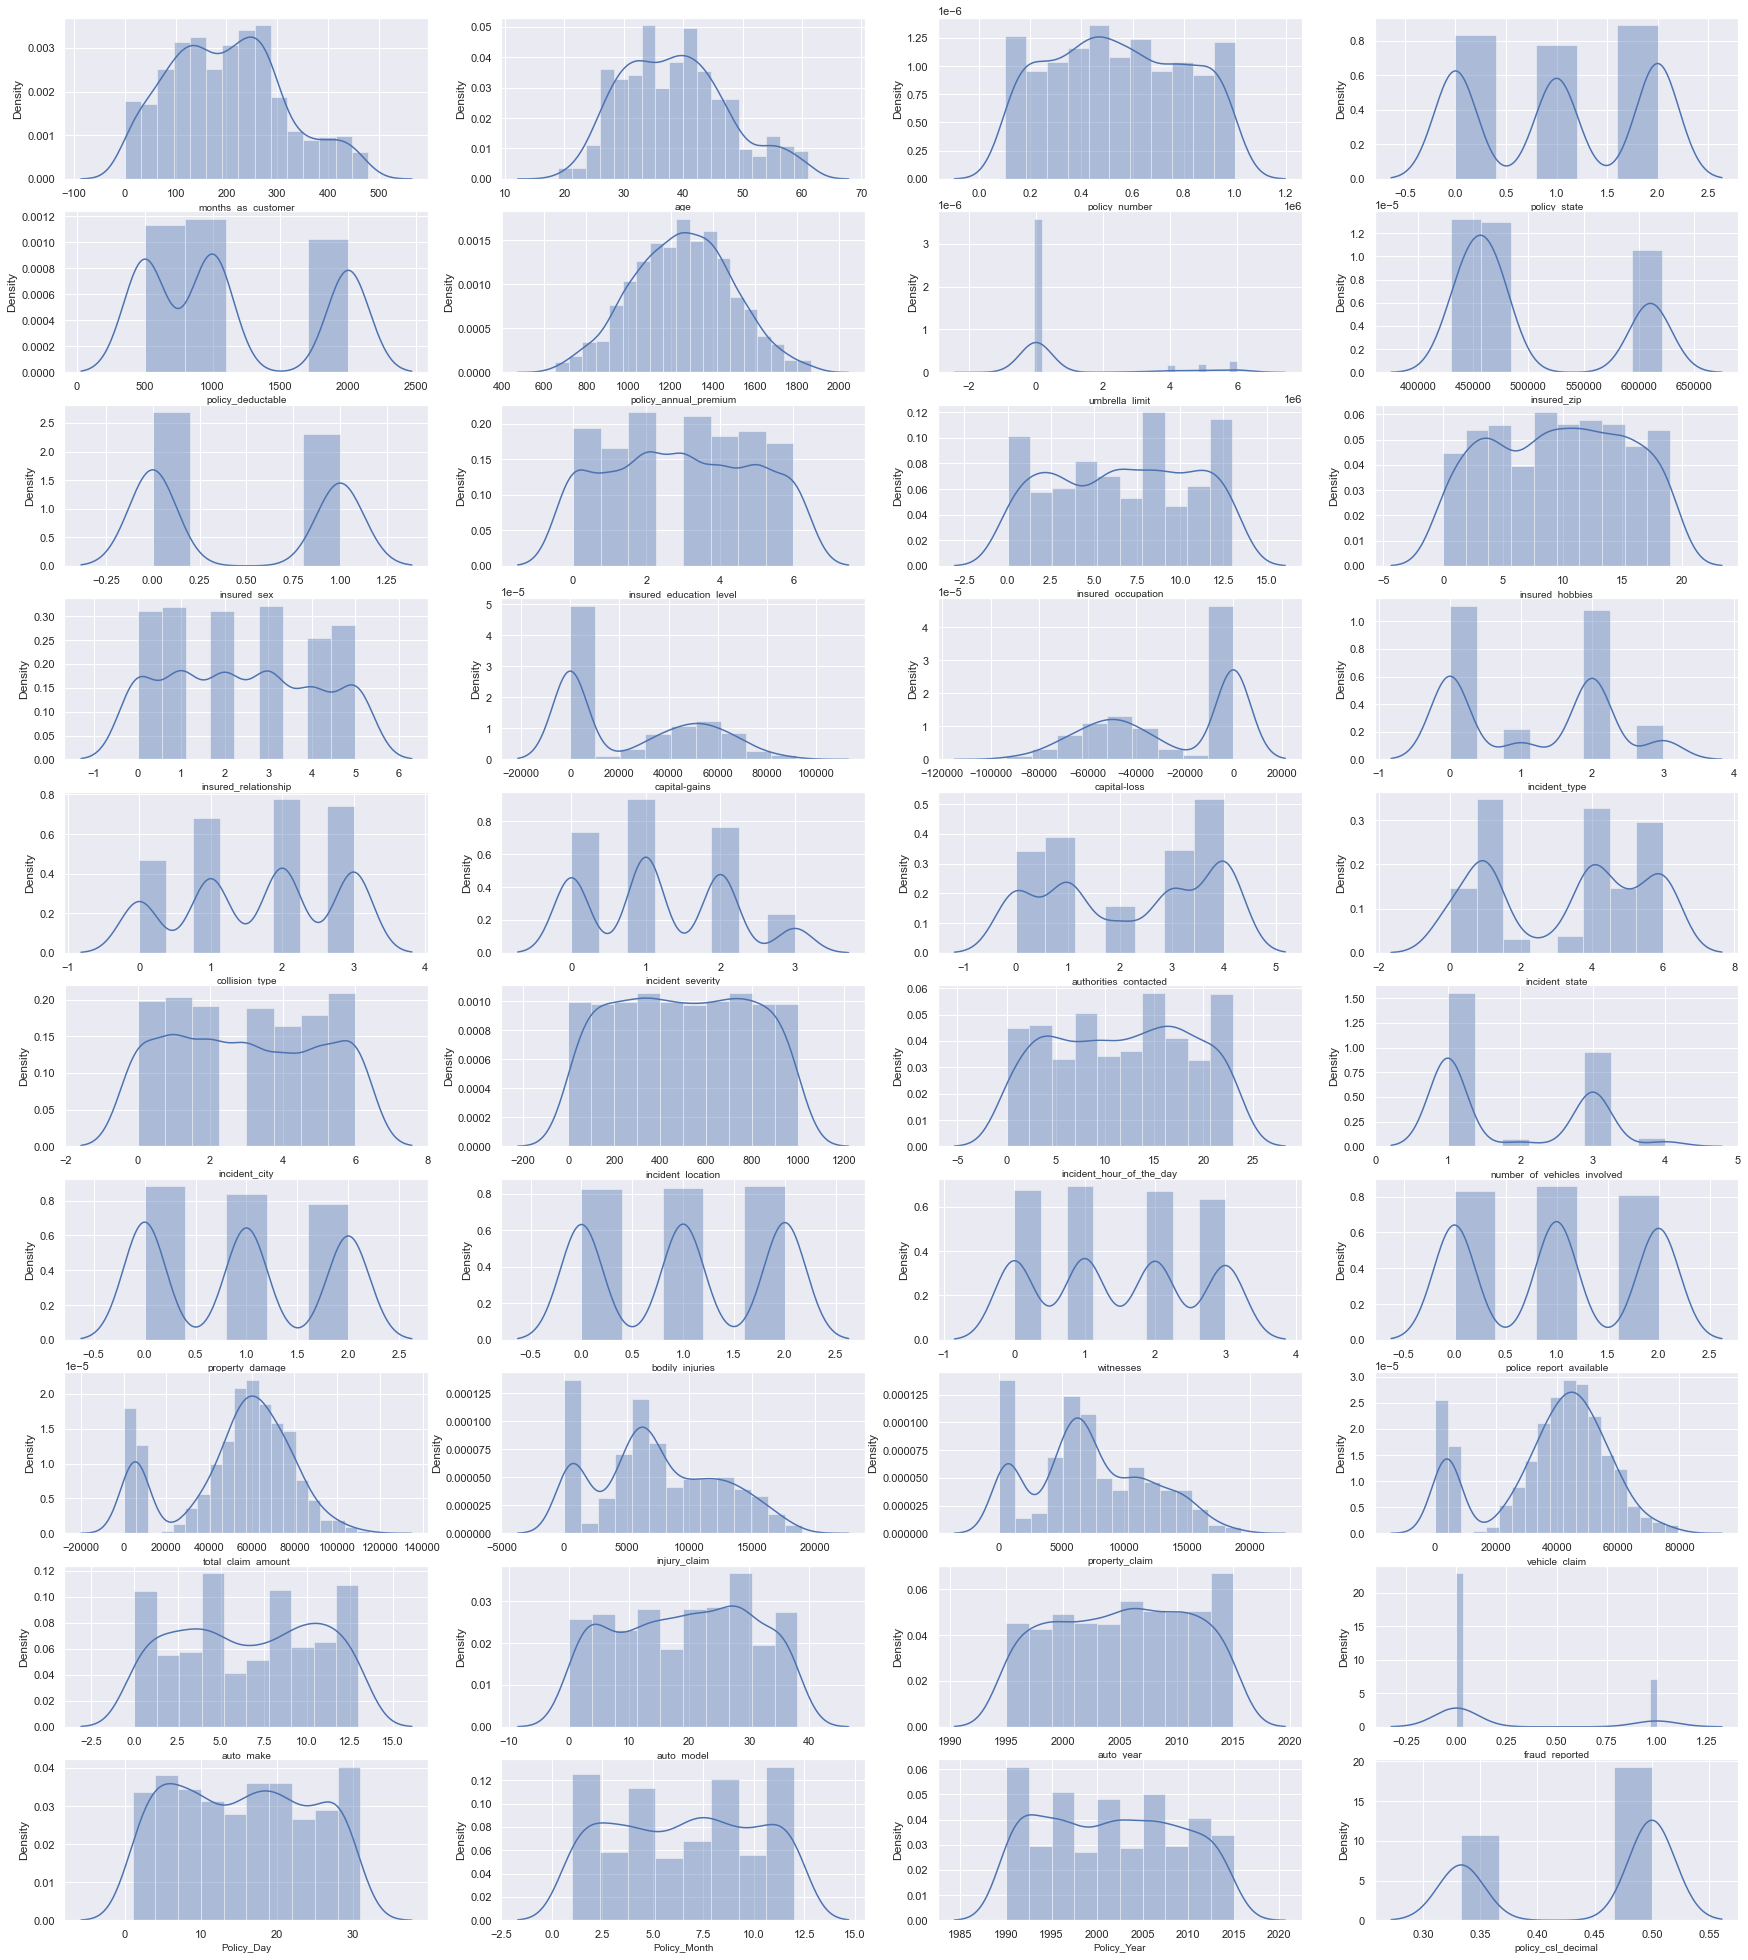

In [52]:
plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

CAPITAL GAIN ,CAPITAL LOSS,PROPERTY CLAIM,INJURY CLAIM,UMBRELLA LIMIT ARE HAVING SKEWNESS

# Removing Skewness

In [53]:
from sklearn.preprocessing import power_transform
df1['capital-gains']=power_transform(x,method='yeo-johnson')
df1['capital-loss']=power_transform(x,method='yeo-johnson')
df1['property_claim']=power_transform(x,method='yeo-johnson')
df1['injury_claim']=power_transform(x,method='yeo-johnson')
df1['umbrella_limit']=power_transform(x,method='yeo-johnson')
df1

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
0,328,48,521585,2,1000,1406.91,1.082744,466132,1,4,...,1.082744,52080,10,1,2004,1,17,10,2014,0.500000
1,228,42,342868,1,2000,1197.22,0.321028,468176,1,4,...,0.321028,3510,8,12,2007,1,27,6,2006,0.500000
2,134,29,687698,2,2000,1413.14,-0.506356,430632,0,6,...,-0.506356,23100,4,30,2007,0,6,9,2000,0.333333
3,256,41,227811,0,2000,1415.74,0.543846,608117,0,6,...,0.543846,50720,3,34,2014,1,25,5,1990,0.500000
4,228,44,367455,0,1000,1583.91,0.321028,610706,1,0,...,0.321028,4550,0,31,2009,0,6,6,2014,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,141,30,681486,1,1000,1347.04,-0.439225,430665,1,2,...,-0.439225,4860,6,10,1996,0,24,3,2007,0.500000
995,3,38,941851,2,1000,1310.80,-2.275091,431289,0,5,...,-2.275091,61040,6,6,2006,0,16,7,1991,0.500000
996,285,41,186934,0,1000,1436.79,0.766266,608177,0,6,...,0.766266,72320,13,28,2015,0,5,1,2014,0.333333
997,130,34,918516,2,500,1383.49,-0.545234,442797,0,5,...,-0.545234,52500,11,19,1996,0,17,2,2003,0.500000


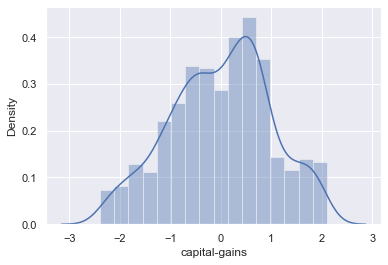

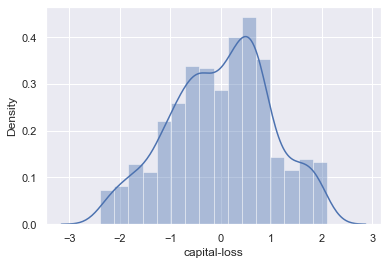

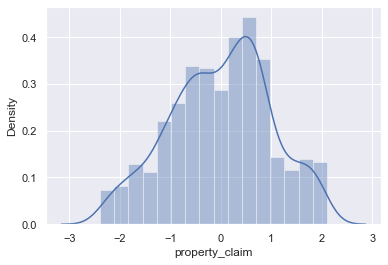

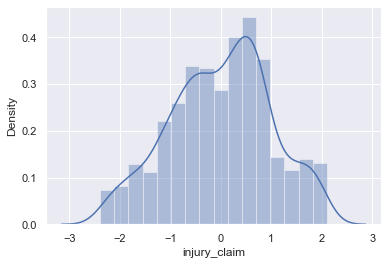

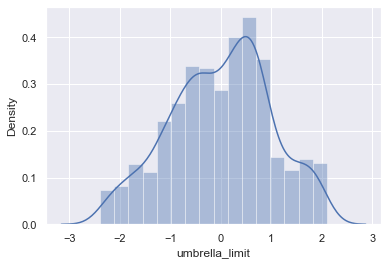

In [54]:
skeww=['capital-gains','capital-loss','property_claim','injury_claim','umbrella_limit']

for s in skeww:
    sns.distplot(df1[s])
    plt.show()

# Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_Day,Policy_Month,Policy_Year,policy_csl_decimal
0,1.117350,1.043277,-0.084169,1.177156,-0.225660,0.643496,-0.431249,-0.477731,1.077033,0.528789,...,-0.189382,1.241434,0.761684,0.842643,-1.641305,-0.185672,0.178020,0.981108,1.681098,0.743841
1,0.231705,0.372286,-0.775975,-0.027559,1.411934,-0.257272,2.243660,-0.448998,1.077033,0.528789,...,-1.377938,-1.400935,-1.826047,0.348364,-0.649865,0.317616,1.308967,-0.159686,0.597166,0.743841
2,-0.600801,-1.081528,0.558847,1.177156,1.411934,0.670259,2.243660,-0.976752,-0.928477,1.548597,...,0.057456,-0.738184,-0.782323,-0.640193,0.972491,0.317616,-1.066023,0.695909,-0.215783,-1.344373
3,0.479686,0.260454,-1.221356,-1.232274,1.411934,0.681428,2.778642,1.518146,-0.928477,1.548597,...,-0.224645,-0.200644,0.689226,-0.887333,1.333014,1.491956,1.082777,-0.444885,-1.570697,0.743841
4,0.231705,0.595949,-0.680800,-1.232274,-0.225660,1.403838,2.778642,1.554540,1.077033,-1.510827,...,-1.270076,-1.429000,-1.770638,-1.628751,1.062621,0.653142,-1.066023,-0.159686,1.681098,0.743841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.538806,-0.969697,0.534801,-0.027559,-0.225660,0.386312,-0.431249,-0.976289,1.077033,-0.491019,...,-1.427721,-1.336171,-1.754121,-0.145915,-0.830127,-1.527775,0.969683,-1.015282,0.732657,0.743841
914,-1.760995,-0.075042,1.542663,1.177156,-0.225660,0.230635,-0.431249,-0.967517,-0.928477,1.038693,...,2.077794,0.313150,1.239059,-0.145915,-1.190651,0.149854,0.064925,0.125512,-1.435206,0.743841
915,0.736522,0.260454,-1.379589,-1.232274,-0.225660,0.771852,-0.431249,1.518990,-0.928477,1.548597,...,2.210547,2.333785,1.840039,1.584061,0.792229,1.659719,-1.179117,-1.585679,1.681098,-1.344373
916,-0.636227,-0.522369,1.452334,1.177156,-1.044457,0.542891,1.173696,-0.805750,-0.928477,1.038693,...,0.015971,0.049777,0.784061,1.089782,-0.018949,-1.527775,0.178020,-1.300481,0.190692,0.743841


# Checking VIF values to solve multicollinearity

In [56]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'Policy_Day', 'Policy_Month', 'Policy_Year',
       'policy_csl_decimal'],
      dtype='object')

In [57]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.878282,months_as_customer
1,6.935287,age
2,1.037484,policy_number
3,1.039676,policy_state
4,1.048954,policy_deductable
5,1.043699,policy_annual_premium
6,1.040931,umbrella_limit
7,1.038616,insured_zip
8,1.029059,insured_sex
9,1.048356,insured_education_level


AS TOTAL CLAIM,PROPERTY CLAIM,VEHICLE CLAIM,INJURY CLAIM ARE SHOWING INF ,SO DROPPING TOTAL CLAIM AND LETS SEE AGAIN THE RESULTS OF VIF

In [58]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [59]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.878282,months_as_customer
1,6.935287,age
2,1.037484,policy_number
3,1.039676,policy_state
4,1.048954,policy_deductable
5,1.043699,policy_annual_premium
6,1.040931,umbrella_limit
7,1.038616,insured_zip
8,1.029059,insured_sex
9,1.048356,insured_education_level


as we can see that their is not multicolinearity seen as VIF is not above 10 for any column,so we can move forward for model building.

# Splitting the DataFrame and Model selection

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=170)

# 1)LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is
 0.7970297029702971
Confusion Matrix
 [[145  21]
 [ 20  16]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       166
           1       0.43      0.44      0.44        36

    accuracy                           0.80       202
   macro avg       0.66      0.66      0.66       202
weighted avg       0.80      0.80      0.80       202



Cross Validation

In [62]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 78.10457516339869 and Accuracy score is 79.70297029702971
At cross fold 3 the Cross Val score is 76.47058823529412 and Accuracy score is 79.70297029702971
At cross fold 4 the Cross Val score is 78.32257452059996 and Accuracy score is 79.70297029702971
At cross fold 5 the Cross Val score is 78.21572820147303 and Accuracy score is 79.70297029702971
At cross fold 6 the Cross Val score is 77.2331154684096 and Accuracy score is 79.70297029702971
At cross fold 7 the Cross Val score is 77.88407521231949 and Accuracy score is 79.70297029702971
At cross fold 8 the Cross Val score is 78.10545385202136 and Accuracy score is 79.70297029702971
At cross fold 9 the Cross Val score is 77.99564270152506 and Accuracy score is 79.70297029702971


# 2) DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

Accuracy score
 0.8316831683168316
Confusion Matrix
 [[141  25]
 [  9  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       166
           1       0.52      0.75      0.61        36

    accuracy                           0.83       202
   macro avg       0.73      0.80      0.75       202
weighted avg       0.87      0.83      0.84       202



Cross Validation

In [64]:
test_accuracy = accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 77.8867102396514 and Accuracy score is 83.16831683168317
At cross fold 3 the Cross Val score is 79.62962962962963 and Accuracy score is 83.16831683168317
At cross fold 4 the Cross Val score is 79.52107461553067 and Accuracy score is 83.16831683168317
At cross fold 5 the Cross Val score is 79.96436208125446 and Accuracy score is 83.16831683168317
At cross fold 6 the Cross Val score is 81.37254901960783 and Accuracy score is 83.16831683168317
At cross fold 7 the Cross Val score is 79.7346419483824 and Accuracy score is 83.16831683168317
At cross fold 8 the Cross Val score is 80.06960335621662 and Accuracy score is 83.16831683168317
At cross fold 9 the Cross Val score is 79.08496732026144 and Accuracy score is 83.16831683168317


# 3) RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.8217821782178217
Confusion Matrix
 [[151  15]
 [ 21  15]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       166
           1       0.50      0.42      0.45        36

    accuracy                           0.82       202
   macro avg       0.69      0.66      0.67       202
weighted avg       0.81      0.82      0.82       202



Cross Validation

In [66]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()

# 4) SUPPORT VECTOR CLASSIFIER

In [67]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8168316831683168
Confusion Matrix
 [[164   2]
 [ 35   1]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       166
           1       0.33      0.03      0.05        36

    accuracy                           0.82       202
   macro avg       0.58      0.51      0.47       202
weighted avg       0.74      0.82      0.75       202



Cross Validation

In [68]:
test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 75.92592592592592 and Accuracy score is 81.68316831683168
At cross fold 3 the Cross Val score is 75.599128540305 and Accuracy score is 81.68316831683168
At cross fold 4 the Cross Val score is 76.03474463641543 and Accuracy score is 81.68316831683168
At cross fold 5 the Cross Val score is 75.81848420052269 and Accuracy score is 81.68316831683168
At cross fold 6 the Cross Val score is 76.1437908496732 and Accuracy score is 81.68316831683168
At cross fold 7 the Cross Val score is 76.25078483857111 and Accuracy score is 81.68316831683168
At cross fold 8 the Cross Val score is 76.03546910755149 and Accuracy score is 81.68316831683168
At cross fold 9 the Cross Val score is 76.36165577342048 and Accuracy score is 81.68316831683168


# 5) GradientBoostingClassifier

In [69]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))

Accuracy score
 0.8366336633663366
Confusion Matrix
 [[141  25]
 [  8  28]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       166
           1       0.53      0.78      0.63        36

    accuracy                           0.84       202
   macro avg       0.74      0.81      0.76       202
weighted avg       0.87      0.84      0.85       202



Cross Validation

In [70]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 82.02614379084967 and Accuracy score is 83.66336633663366
At cross fold 3 the Cross Val score is 81.4814814814815 and Accuracy score is 83.66336633663366
At cross fold 4 the Cross Val score is 82.13594076324283 and Accuracy score is 83.66336633663366
At cross fold 5 the Cross Val score is 82.57543359467809 and Accuracy score is 83.66336633663366
At cross fold 6 the Cross Val score is 81.91721132897604 and Accuracy score is 83.66336633663366
At cross fold 7 the Cross Val score is 82.35765506757873 and Accuracy score is 83.66336633663366
At cross fold 8 the Cross Val score is 81.92315026697177 and Accuracy score is 83.66336633663366
At cross fold 9 the Cross Val score is 82.46187363834422 and Accuracy score is 83.66336633663366


# 6) ExtraTreesClassifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))

Accuracy score
 0.8316831683168316
Confusion Matrix
 [[154  12]
 [ 22  14]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       166
           1       0.54      0.39      0.45        36

    accuracy                           0.83       202
   macro avg       0.71      0.66      0.68       202
weighted avg       0.82      0.83      0.82       202



Cross Validation

In [72]:
test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 76.47058823529412 and Accuracy score is 83.16831683168317
At cross fold 3 the Cross Val score is 75.92592592592592 and Accuracy score is 83.16831683168317
At cross fold 4 the Cross Val score is 75.81687867856463 and Accuracy score is 83.16831683168317
At cross fold 5 the Cross Val score is 78.32501781895938 and Accuracy score is 83.16831683168317
At cross fold 6 the Cross Val score is 75.49019607843137 and Accuracy score is 83.16831683168317
At cross fold 7 the Cross Val score is 76.69029443838603 and Accuracy score is 83.16831683168317
At cross fold 8 the Cross Val score is 78.10640732265446 and Accuracy score is 83.16831683168317
At cross fold 9 the Cross Val score is 76.79738562091502 and Accuracy score is 83.16831683168317


# 7)KNeighborsClassifier

In [73]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))

Accuracy score
 0.7871287128712872
Confusion Matrix
 [[153  13]
 [ 30   6]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       166
           1       0.32      0.17      0.22        36

    accuracy                           0.79       202
   macro avg       0.58      0.54      0.55       202
weighted avg       0.74      0.79      0.76       202



Cross Validation

In [74]:
test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 72.33115468409585 and Accuracy score is 78.71287128712872
At cross fold 3 the Cross Val score is 72.44008714596949 and Accuracy score is 78.71287128712872
At cross fold 4 the Cross Val score is 72.8778241883425 and Accuracy score is 78.71287128712872
At cross fold 5 the Cross Val score is 72.55405084343074 and Accuracy score is 78.71287128712872
At cross fold 6 the Cross Val score is 73.63834422657952 and Accuracy score is 78.71287128712872
At cross fold 7 the Cross Val score is 73.42453983675358 and Accuracy score is 78.71287128712872
At cross fold 8 the Cross Val score is 73.09877955758964 and Accuracy score is 78.71287128712872
At cross fold 9 the Cross Val score is 73.20261437908496 and Accuracy score is 78.71287128712872


ALL THE MODEL PERFORMING WELL BUT ,GRADIENT BOOSTING CLASSIFIER IS DOING BEST IN THEM, difference between accuracy score and cv score is very less

# Hyper Parameter Tuning for best model.

In [75]:
#ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10]}

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 4, 'max_features': 'auto'}

In [76]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

Accuracy score
 0.8663366336633663
Confusion Matrix
 [[145  21]
 [  6  30]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       166
           1       0.59      0.83      0.69        36

    accuracy                           0.87       202
   macro avg       0.77      0.85      0.80       202
weighted avg       0.89      0.87      0.87       202



Thus after hyperparameter results are good for best model gradient boosting classifier

# COMPARING ROC AUC PLOT WITH MODELS

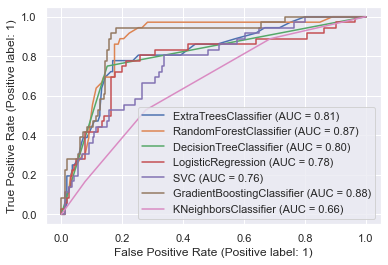

In [77]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(ETC,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lo, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbk, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knc, x_test, y_test, ax=disp.ax_)




plt.legend(prop={'size':11}, loc='lower right')
plt.show()

AUC for Bagging Classifier is highest=90% but for our best model gradient boosting AUC is also good i.e, 88%

# Plotting ROC AUC for best model

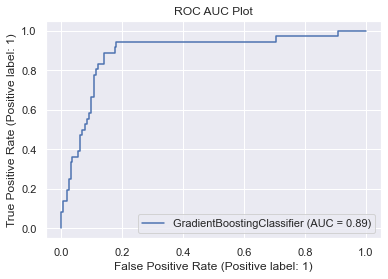

In [78]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the best Model

In [79]:
# save the model to disk
import pickle

filename = 'Customer_churn.pkl'
pickle.dump(gcv.best_estimator_, open(filename, 'wb'))
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8663366336633663


# Final Prediction Submission

In [80]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
197,0,0
198,0,0
199,0,0
200,0,0
